In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


### 1. Crawl Data from a website


In [ ]:
page_index =1
count =0
check =True
data =[]
while check:
        url = f"https://philong.com.vn/tim?scat_id=&q=&page={page_index}"
        response = requests.get(url)
        

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')
        # Find all product categories
        products = soup.find_all('div', class_='p-item')
        website = "https://philong.com.vn"
        if products ==[]:
            break
        page_index+=1
        # Loop through each category and extract relevant information
        for product in products:
            # Extract the category name
            
            try:

                name = product.find('h4').text.strip()
                price = product.find(class_='p-price').text.strip()
                unprice = product.find(class_='p-unprice').text.strip()
                summary = product.find(class_='p-summary').text.strip()
                status=1
                brand_tag = product.find(class_='p-brand')
                brand = brand_tag.find('img').get('alt')
                if (product.find(class_='btn-add')!=None):
                    status =1
                else:
                    status =0

                if (product.find(class_='p-sale')!=None):
                    sale = product.find(class_ ='p-sale').text.strip() 
                else:
                    sale ="N/A"
                if (product.find(class_='p-promotion')!=None):
                    promotion = product.find(class_ ='p-promotion').text.strip() 
                else:
                    promotion ="N/A"
                row = [website,name,price,unprice,sale,promotion,summary,status,brand]
                
                data.append(row)
            except AttributeError:
                sale =''
                promotion=''
                unprice =0
            
       

print(len(data))
df = pd.DataFrame(data, columns=['Website','Name', 'Price', 'Unprice','Sale','Promotion','Summary','Status','Brand'])
df.to_csv('crawl.csv', index=False)


In [2]:
df = pd.read_csv('crawl.csv')


Thay đổi những sản phẩm có giá liên hệ thành 0đ


In [3]:
df['Price'] = df['Price'].replace("Giá: Liên hệ","0 đ")

### 2. Làm sạch dữ liệu:
Thay đổi những thuộc tính của dữ liệu:
- Mức sale trong dữ liệu là âm, chuyển thành dương

- Ghi in thường các kí tự thuộc trường Name
- Ghép giá cả lại thành 1 số


Fill các giá trị NaN:
- Sale: Nếu không có là 0%
- Promotion: Nếu không có sẽ là "None"


In [ ]:
names = df['Name']
names =[str(name).lower().strip() for name in names]
df['Name'] = names

In [ ]:
prices = df['Price']
prices = [''.join(price[:-2].split('.')) for price in prices]
df['Price'] = prices

In [ ]:
brands = df['Brand']
brands = [str(brand).lower().strip() for brand in brands]

df['Brand'] = brands

In [ ]:

sales = df['Sale']
sales = [int(sale[:-1])*-1 for sale in sales]
df['Sale']= sales
df['Sale']


In [50]:
df['Sale'].fillna('0%',inplace=True)
df['Promotion'].fillna('Không có',inplace=True)
df['Summary'].fillna('Không có',inplace=True)



In [34]:
df['Type'] = df.apply(lambda row: row['Name'].split(row['Brand'])[0].strip(), axis=1)


In [51]:
df.to_csv('cleaned.csv',index=False)

### 3. Thống kê dữ liệu:

In [2]:
df = pd.read_csv('cleaned.csv')
df.head(20)

,Website,Name,Price,Unprice,Sale,Promotion,Summary,Status,Brand,price_range,Type
0,https://philong.com.vn,"laptop msi katana 15 b13vek-252vn (i7-13620h, ...",32450000,32450000 đ,0,Khuyến mại: Vòng quay may mắn trúng phiếu mua ...,"CPU: Intel Core i7-13620H (10 nhân/ 16 luồng, ...",1,msi,Above 20M,laptop
1,https://philong.com.vn,chuột apple magic mouse silver mk2e3za/a,1690000,2.390.000 đ,29,Không có,Thiết kế mỏng nhẹ tạo cảm giác thoải mái khi s...,1,apple,1M to 5M,chuột
2,https://philong.com.vn,router wifi 6 tplink archer ax53 gigabit băng ...,1690000,1690000 đ,0,Không có,Wi-Fi 6 Gigabit thế hệ tiếp theo tốc độ — 2402...,0,tp-link,1M to 5M,router wifi 6 tplink archer ax53 gigabit băng ...
3,https://philong.com.vn,router wifi băng tầng kép ac1200 tp-link arche...,790000,790000 đ,0,Không có,Tốc độ WIFI WiFi Wave2 802.11ac– 867 Mbps trên...,1,tp-link,Under 1M,router wifi băng tầng kép ac1200
4,https://philong.com.vn,"máy in lazer ricoh mp 2014d (a3 2 mặt, scan, c...",13900000,13900000 đ,0,Khuyến mại: Tặng Ổ cắm điện Pisen 005EP/PSCXB-...,"Tốc độ in: 20 bản/phút, in 2 mặt tự động\nT...",1,ricoh,10M to 15M,máy in lazer
5,https://philong.com.vn,laptop hp probook 440 g9 (6m0x2pa) (intel core...,17990000,20.090.000 đ,10,Khuyến mại: Chuột không dây yên tĩnh HP Z3700 ...,"CPU: Intel Core i5-1235U (1.3Ghz up to 4.4GHz,...",1,hp,15M to 20M,laptop
6,https://philong.com.vn,"bộ phát wifi totolink x2000r, băng tầng kép ax...",990000,990000 đ,0,Không có,"Chuẩn Wi-Fi 6 (IEEE 802.11ax) thế hệ mới nhất,...",1,totolink,Under 1M,bộ phát wifi
7,https://philong.com.vn,usb wifi 6 totolink x6100ua (băng tần kép ax1800),650000,650000 đ,0,Không có,Tương thích chuẩn Wi-Fi IEEE 802.11a/b/g/n/ac/...,1,totolink,Under 1M,usb wifi 6
8,https://philong.com.vn,bộ phát wifi 6 tp-link archer ax23 ax1800,1500000,1500000 đ,0,Không có,Wi-Fi siêu nhanh 1.8 Gbps – Tận hưởng truyền t...,1,tp-link,1M to 5M,bộ phát wifi 6
9,https://philong.com.vn,giá đỡ tản nhiệt hyperstand folding aluminium ...,730000,730000 đ,0,Không có,Chất liệu: Alumium cao cấp.\nKích thước: 60 x ...,1,hyperdrive,Under 1M,giá đỡ tản nhiệt hyperstand folding aluminium ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6895 entries, 0 to 6894
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Website      6895 non-null   object  
 1   Name         6895 non-null   object  
 2   Price        6895 non-null   int64   
 3   Unprice      6895 non-null   object  
 4   Sale         6895 non-null   int64   
 5   Promotion    6895 non-null   object  
 6   Summary      6895 non-null   object  
 7   Status       6895 non-null   int64   
 8   Brand        6895 non-null   object  
 9   price_range  6895 non-null   category
 10  Type         6817 non-null   object  
dtypes: category(1), int64(3), object(7)
memory usage: 545.7+ KB


Thống kê top số lượng sản phẩm theo brand (hãng):

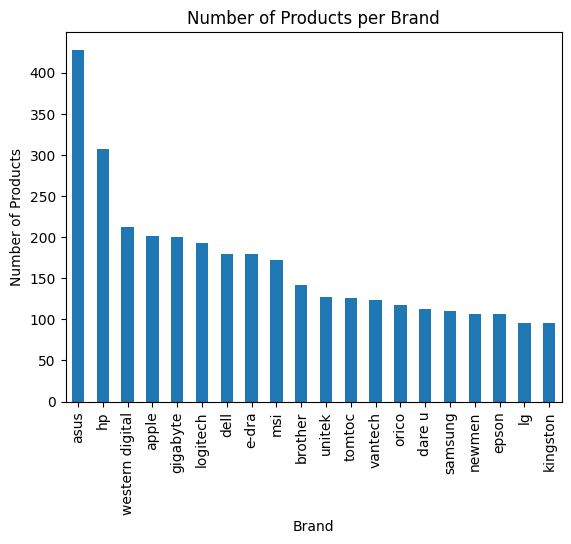

In [39]:
counts = df['Brand'].value_counts().head(20)

# create a bar chart of the data
counts.plot(kind='bar', title='Number of Products per Brand', xlabel='Brand', ylabel='Number of Products')

# display the plot
plt.show()

Giá trị lớn nhất và nhỏ nhất của sản phẩm:

In [40]:

df['Price'] = [int(price) for price in df['Price']]
non_zeros_price = df[df['Price']!=0]['Price']

print(df['Price'].max(),non_zeros_price.min())

279000000 8000


Thống kê sản phẩm theo mức giá:

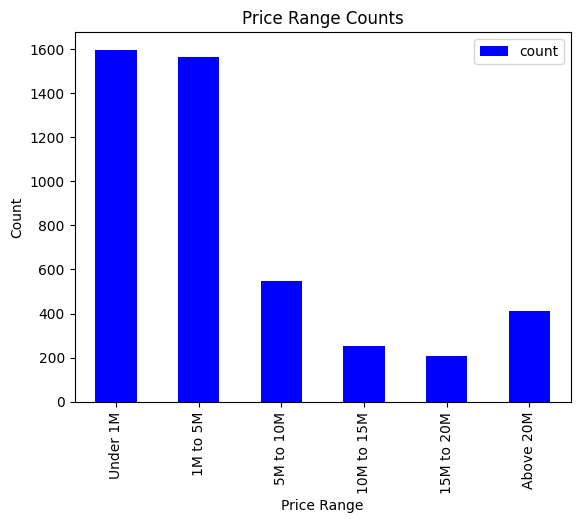

,Price,price_range
0,32450000,Above 20M
1,1690000,1M to 5M
2,1690000,1M to 5M
3,790000,Under 1M
4,13900000,10M to 15M
...,...,...
6890,0,NaN
6891,0,NaN
6892,0,NaN
6893,0,NaN


In [8]:
bins = [0, 1000000, 5000000, 10000000, 15000000, 20000000, float('inf')]

# Create a new column 'price_range' that contains the bin labels
df['price_range'] = pd.cut(df['Price'], bins=bins, labels=['Under 1M', '1M to 5M', '5M to 10M', '10M to 15M', '15M to 20M', 'Above 20M'])

# Group the DataFrame by 'price_range' and count the number of items in each bin
df_counts = df.groupby('price_range').size().reset_index(name='count')

# Display the counts for each price range bin
ax = df_counts.plot.bar(x='price_range', y='count', color='b')

# Set the title and labels for the plot
ax.set_title('Price Range Counts')
ax.set_xlabel('Price Range')
ax.set_ylabel('Count')

# Display the plot
plt.show()
df[['Price','price_range']]

Phân bố của sản phẩm theo hãng và trạng thái:

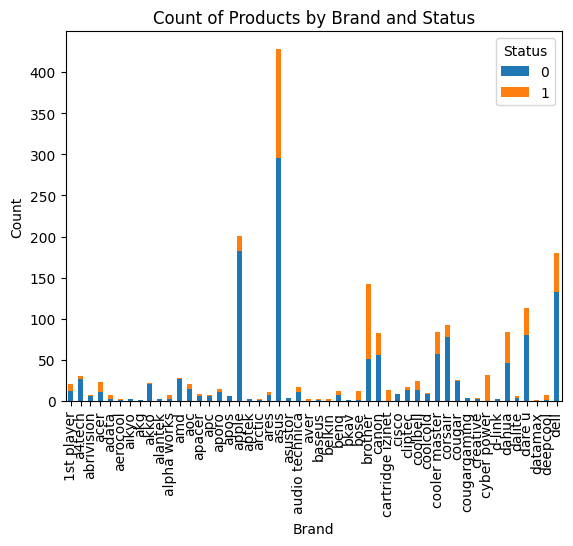

In [12]:
df_status = df.groupby(['Brand', 'Status']).size().unstack().head(50)
df_status.plot(kind='bar', stacked=True)
plt.title('Count of Products by Brand and Status')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

Số lượng sản phẩm đang được khuyên mãi:

In [ ]:
df_status = df.groupby(['Brand', 'Status']).size().unstack()
df_status.plot(kind='bar', stacked=True)
plt.title('Count of Products by Brand and Status')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

Top 10 sản phẩm có giá cao nhất:

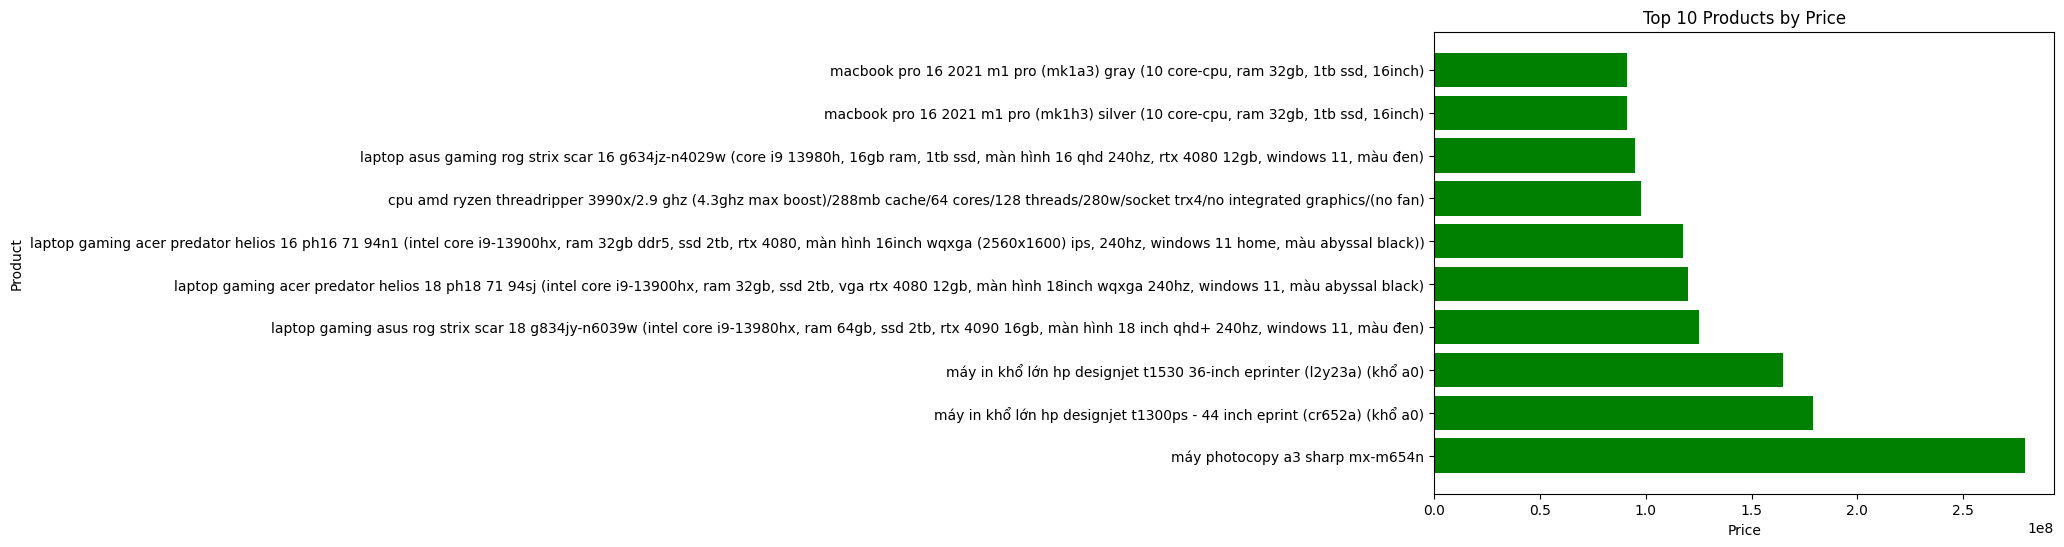

In [42]:
top_products = df.nlargest(10, 'Price')

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_products['Name'], top_products['Price'], color='green')
ax.set_xlabel('Price')
ax.set_ylabel('Product')
ax.set_title('Top 10 Products by Price')
plt.show()

Top 10 sản phẩm có giá thấp nhất:

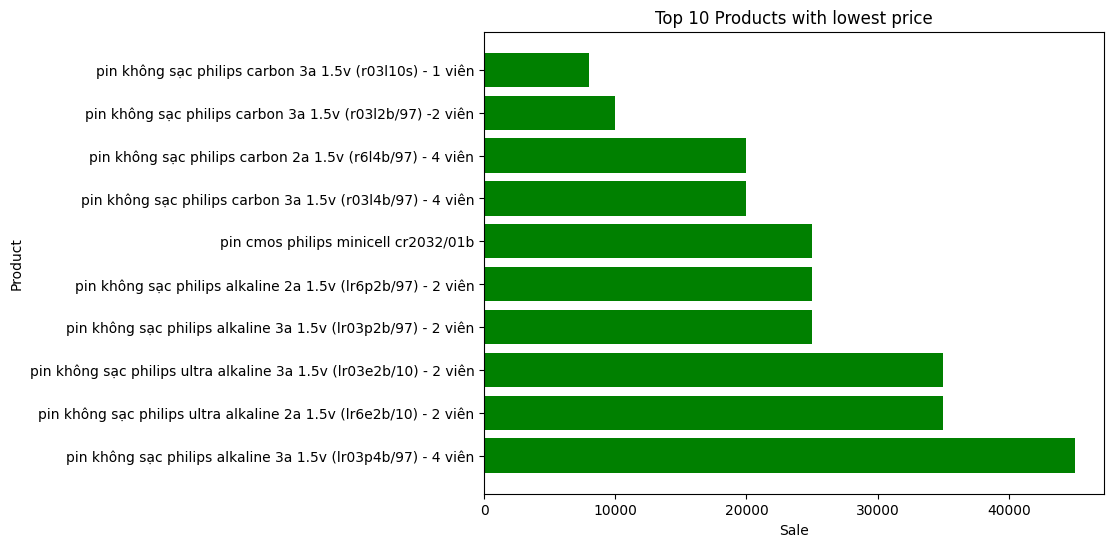

,Website,Name,Price,Unprice,Sale,Promotion,Summary,Status,Brand,price_range,Type
5178,https://philong.com.vn,pin không sạc philips alkaline 3a 1.5v (lr03p4...,45000,45000 đ,0,NaN,Pin Kiềm (Alkaline) AAA\nHạn sử dụng lâu lên đ...,1,philips,Under 1M,pin không sạc
5180,https://philong.com.vn,pin không sạc philips ultra alkaline 2a 1.5v (...,35000,35000 đ,0,NaN,Pin kiềm\nVỉ gồm 2 viên\nTính ứng dụng cao\nHạ...,1,philips,Under 1M,pin không sạc
5181,https://philong.com.vn,pin không sạc philips ultra alkaline 3a 1.5v (...,35000,35000 đ,0,NaN,Pin Kiềm (Alkaline)\nĐiện thế 1.5 V\nVỉ 2 viên,1,philips,Under 1M,pin không sạc
5184,https://philong.com.vn,pin không sạc philips alkaline 3a 1.5v (lr03p2...,25000,25000 đ,0,NaN,Pin Alkaline AA\nHạn sử dụng lên đến 5 năm\nT...,1,philips,Under 1M,pin không sạc
5185,https://philong.com.vn,pin không sạc philips alkaline 2a 1.5v (lr6p2b...,25000,25000 đ,0,NaN,Pin Alkaline AA\nHạn sử dụng lên đến 5 năm\nT...,1,philips,Under 1M,pin không sạc
5187,https://philong.com.vn,pin cmos philips minicell cr2032/01b,25000,25000 đ,0,NaN,Điện thế 3V\nDung luợng pin 210 mAH\nThời hạn ...,0,philips,Under 1M,pin cmos
5188,https://philong.com.vn,pin không sạc philips carbon 3a 1.5v (r03l4b/9...,20000,20000 đ,0,NaN,Dễ dàng sử dụng\nThân thiện với môi trường\nNg...,1,philips,Under 1M,pin không sạc
5189,https://philong.com.vn,pin không sạc philips carbon 2a 1.5v (r6l4b/97...,20000,20000 đ,0,NaN,Vỉ gồm 4 viên Pin AA\nLoại: Pin kẽm\nDễ dàng s...,1,philips,Under 1M,pin không sạc
5193,https://philong.com.vn,pin không sạc philips carbon 3a 1.5v (r03l2b/9...,10000,10000 đ,0,NaN,Vỉ gồm 2 viên pin AAA\nLoại Pin: Kẽm\nDễ dàng ...,1,philips,Under 1M,pin không sạc
5194,https://philong.com.vn,pin không sạc philips carbon 3a 1.5v (r03l10s)...,8000,8000 đ,0,NaN,Size AAA\nĐiện thế 1.5 V\nThời gian sử dụng lâu,1,philips,Under 1M,pin không sạc


In [43]:
bottom_products = df[df['Price']!=0].nsmallest(10,'Price')
bottom_products = bottom_products.sort_values(ascending=False,by='Price')
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(bottom_products['Name'], bottom_products['Price'], color='green')
ax.set_xlabel('Sale')
ax.set_ylabel('Product')
ax.set_title('Top 10 Products with lowest price')
plt.show()
bottom_products

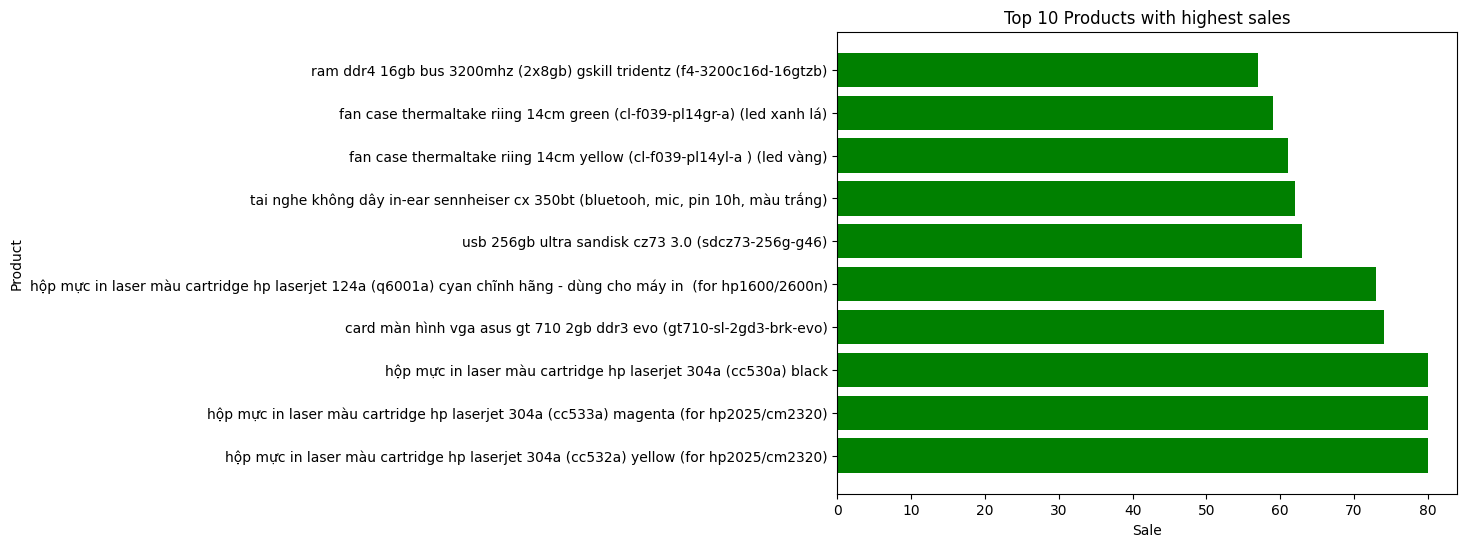

In [44]:
top_products = df.nlargest(10, 'Sale')

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_products['Name'], top_products['Sale'], color='green')
ax.set_xlabel('Sale')
ax.set_ylabel('Product')
ax.set_title('Top 10 Products with highest sales')
plt.show()

Top 10 loại sản phẩm theo số lượng:

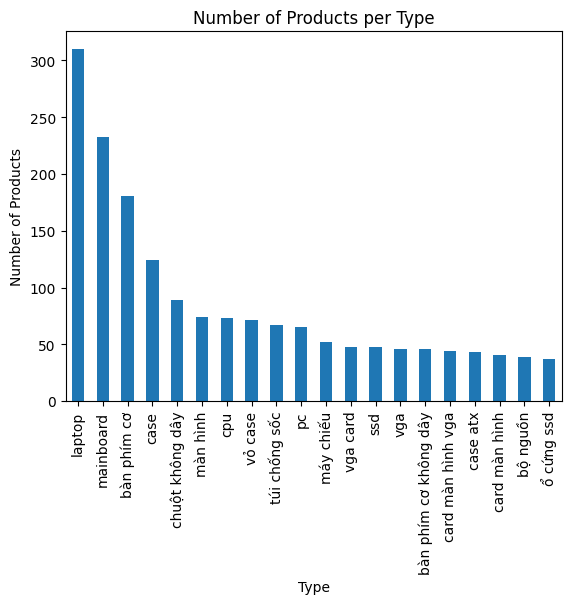

In [57]:
type_counts = df['Type'].value_counts().head(20)

# create a bar chart of the data
type_counts.plot(kind='bar', title='Number of Products per Type', xlabel='Type', ylabel='Number of Products')

# display the plot
plt.show()